# AMEO 2015 data analysis

# Data Description
The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.  


# Importing required modules and libraries

In [309]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot  as plt
import scipy.stats as ss
import scipy as s


In [322]:
data=pd.read_excel(r"C:\Users\DELL\Downloads\aspiring_minds_employability_outcomes_2015.xlsx")

In [323]:
df=data.copy()

In [324]:
df

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [325]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


there are 39 features

3998 data points

In [326]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [327]:
df.drop(columns=['Unnamed: 0', 'ID','CollegeID','CollegeCityID'],inplace=True)

All the ID columns were dropped

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Salary                 3998 non-null   int64         
 1   DOJ                    3998 non-null   datetime64[ns]
 2   DOL                    3998 non-null   object        
 3   Designation            3998 non-null   object        
 4   JobCity                3998 non-null   object        
 5   Gender                 3998 non-null   object        
 6   DOB                    3998 non-null   datetime64[ns]
 7   10percentage           3998 non-null   float64       
 8   10board                3998 non-null   object        
 9   12graduation           3998 non-null   int64         
 10  12percentage           3998 non-null   float64       
 11  12board                3998 non-null   object        
 12  CollegeTier            3998 non-null   int64         
 13  Deg

24 Numerical columns

9 catogorical columns

2 datetime

In [329]:
df.head()

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [275]:
df.dtypes

Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64
Domain                          float64
ComputerProgramming               int64
ElectronicsAndSemicon             int64


In [330]:
df.duplicated().sum()

0

there are no duplicates in this data

In [331]:
df.describe()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,CollegeCityTier,GraduationYear,English,Logical,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,3.076998e+05,77.925443,2008.087544,74.466366,1.925713,71.486171,0.300400,2012.105803,501.649075,501.598799,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,2.127375e+05,9.850162,1.653599,10.999933,0.262270,8.167338,0.458489,31.857271,104.940021,86.783297,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,3.500000e+04,43.000000,1995.000000,40.000000,1.000000,6.450000,0.000000,0.000000,180.000000,195.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,1.800000e+05,71.680000,2007.000000,66.000000,2.000000,66.407500,0.000000,2012.000000,425.000000,445.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,3.000000e+05,79.150000,2008.000000,74.400000,2.000000,71.720000,0.000000,2013.000000,500.000000,505.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,3.700000e+05,85.670000,2009.000000,82.600000,2.000000,76.327500,1.000000,2014.000000,570.000000,565.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,4.000000e+06,97.760000,2013.000000,98.700000,2.000000,99.930000,1.000000,2017.000000,875.000000,795.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [332]:
df.shape

(3998, 35)

After removing unwanted columns the remaining columns are 35

In [333]:
df.describe(include=["object"])

,DOL,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
count,3998,3998,3998,3998,3998,3998,3998,3998,3998
unique,67,419,339,2,275,340,4,46,26
top,present,software engineer,Bangalore,m,cbse,cbse,B.Tech/B.E.,electronics and communication engineering,Uttar Pradesh
freq,1875,539,627,3041,1395,1400,3700,880,915


# univariate analysis

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Salary distribution plot')

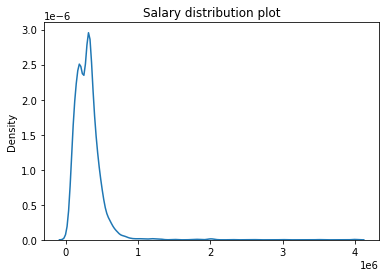

In [334]:
sns.distplot(x=df["Salary"],hist=False)
plt.title("Salary distribution plot")

We can observe that the salary data is right skewed.

mostly the salary ranges below 10 lakhs

Text(0.5, 1.0, 'Boxplot chart')

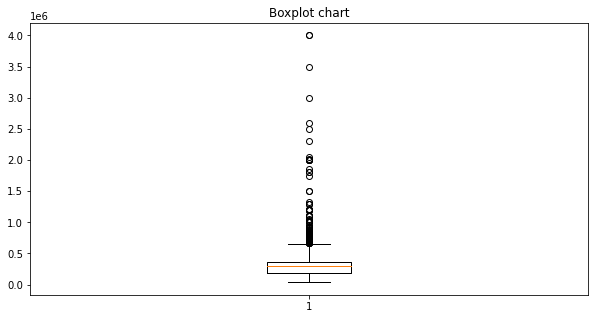

In [288]:
plt.figure(figsize=(10,5))
plt.boxplot(x=df["Salary"])
plt.title("Boxplot chart")

In [335]:
print(df.Salary.mean())
print(df.Salary.min())
print(df.Salary.max())

307699.8499249625
35000
4000000


There are outliers in this column 
The mean of the salary is 307699 



(array([3.398e+03, 5.500e+02, 2.700e+01, 6.000e+00, 8.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([  35000.,  431500.,  828000., 1224500., 1621000., 2017500.,
        2414000., 2810500., 3207000., 3603500., 4000000.]),
 <BarContainer object of 10 artists>)

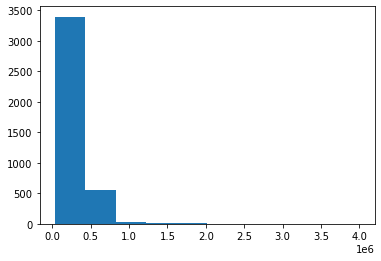

In [301]:
#histogram of salary data
plt.hist(df['Salary'],bins=10)

From the above plot we can say that most of the salaries are below 2 lakhs 

<AxesSubplot:xlabel='Logical', ylabel='Salary'>

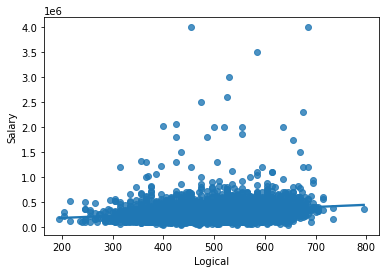

In [302]:
sns.regplot(x='Logical', y='Salary', data=df)


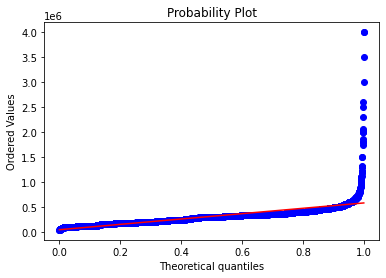

In [310]:
ss.probplot(df['Salary'],dist="uniform",plot=plt)
plt.show()

The above distribution also clearly says that the salaries mostly are below 2 lakhs
Few salaries are high

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 1080x360 with 0 Axes>

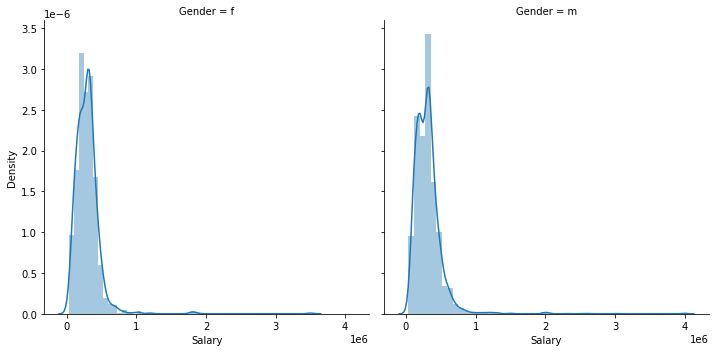

In [300]:
plt.figure(figsize=(15,5))
sns.FacetGrid(df, col="Gender", size=5) \
   .map(sns.distplot, "Salary",bins=50) \
   .add_legend()
plt.show()


We can observe that the salary data is right skewed.
We can also see that the distributions are quite similar for male and female in the range below 10lakhs.

In [171]:
print(df.Salary.quantile(0.25))
print(df.Salary.quantile(0.50))
print(df.Salary.quantile(0.75))

180000.0
300000.0
370000.0


In [289]:
df["Gender"].value_counts()


m    3041
f     957
Name: Gender, dtype: int64

The above indicates there are 3 times more men than women employed


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

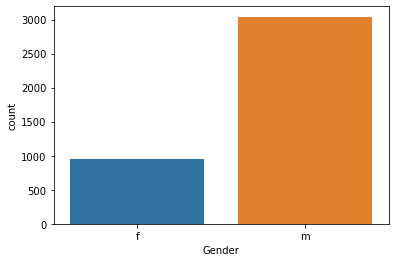

In [295]:
sns.countplot(df['Gender'])


Text(0.5, 0.98, 'Salary levels by gender')

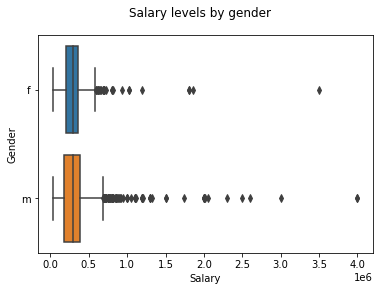

In [296]:
sns.boxplot(x='Salary', y = 'Gender', data=df)
plt.suptitle('Salary levels by gender')

It is noted that there are many outliers in the salary data
There is not much difference between median salary for both genders.
As there are more men we can see salaries are also high in number compared to men

In [160]:
df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').mean()

,10percentage,12percentage,collegeGPA
Gender,,,
f,80.932894,77.007618,74.048056
m,76.979000,73.666636,70.679947


In [161]:
df[['10percentage', '12percentage', 'collegeGPA', 'Gender']].groupby('Gender').median()

,10percentage,12percentage,collegeGPA
Gender,,,
f,82.4,77.0,74.00
m,78.0,73.4,70.66


In [162]:
df[['conscientiousness', 'agreeableness', 'extraversion','nueroticism', 'openess_to_experience', 'Gender']].groupby('Gender').mean()

,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
Gender,,,,,
f,0.121034,0.292444,0.012173,-0.179358,0.038246
m,-0.087826,0.100566,-0.000198,-0.165783,-0.193609


In [304]:
df["Specialization"].value_counts()

electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrumentation eng               32
civil engineering                               29
electronics and instrumentation engineering     27
information science engineering                 27
instrumentation and control engineering         20
electronics engineering                         19
biotechnology                                   15
other                                           13
industrial & production engineering             10
applied electronics and instrumentation          9
chemical engineering           

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


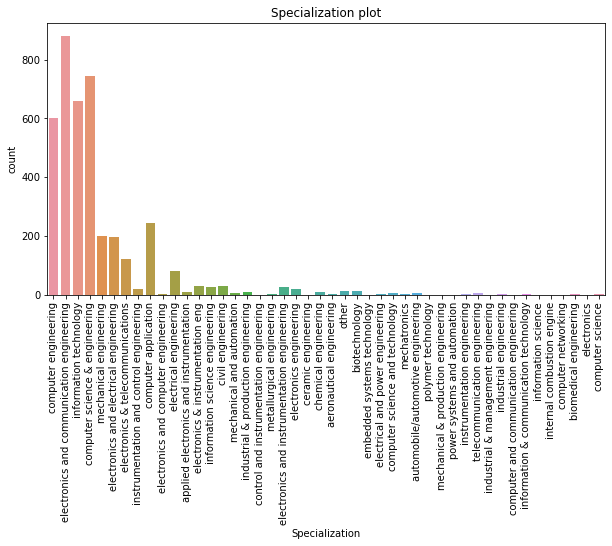

In [338]:
plt.figure(figsize=(10,5))
sns.countplot(df["Specialization"])
plt.xticks(rotation=90)
plt.title("Specialization plot")
plt.show()


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


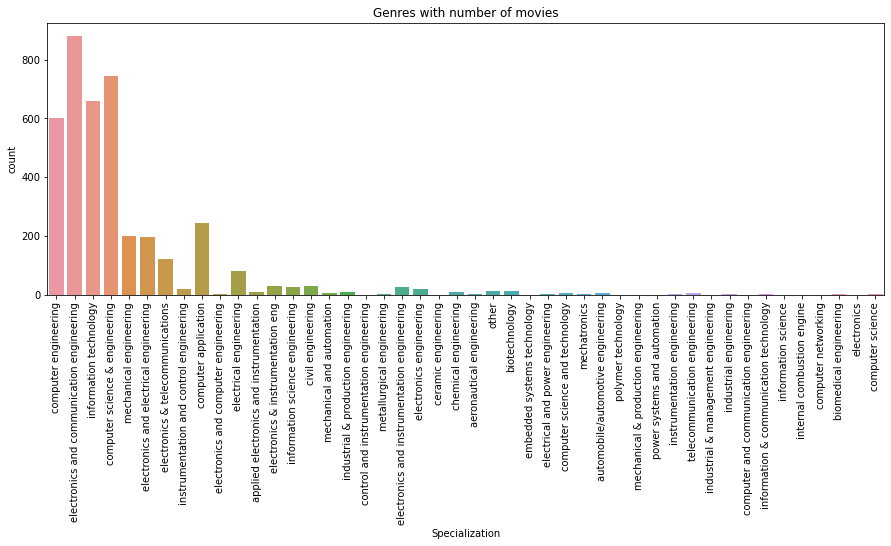

In [308]:
plt.figure(figsize=(15,5))
sns.countplot(df["Specialization"])
plt.xticks(rotation=90)
plt.title("Genres with number of movies")
plt.show()

Most of them specialized in electronics and communication engineering
Next is computer science and engineering
Next is IT
Next is computer engineering


In [339]:
# Fetching years data from DOJ Column
#handling Date column
Year = df.DOJ.dt.year
Year.value_counts()

2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009       5
2007       4
2004       1
2008       1
2006       1
1991       1
Name: DOJ, dtype: int64

In [340]:
df['YOJ'] = Year

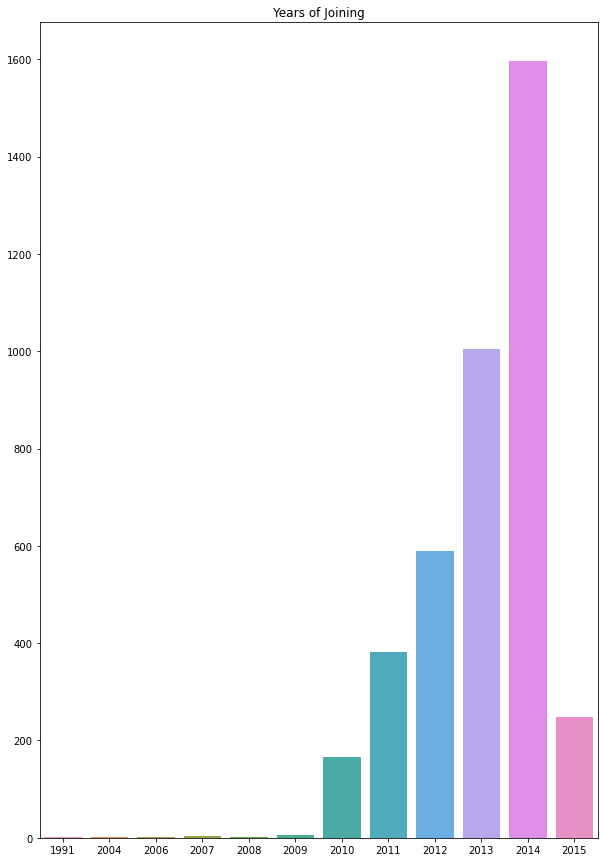

In [341]:
plt.figure(figsize=(10,15))
sns.countplot(x=Year)
plt.title("Years of Joining")
plt.xlabel("")
plt.ylabel("")
plt.show()

Maximum joinings in the year 2013 and 2014

In [342]:
Month = df.DOJ.dt.month_name()
Month.value_counts()

July         488
August       451
June         390
January      372
September    358
October      332
March        303
February     297
December     290
November     273
April        238
May          206
Name: DOJ, dtype: int64

In [343]:
df["MOJ"]=Month

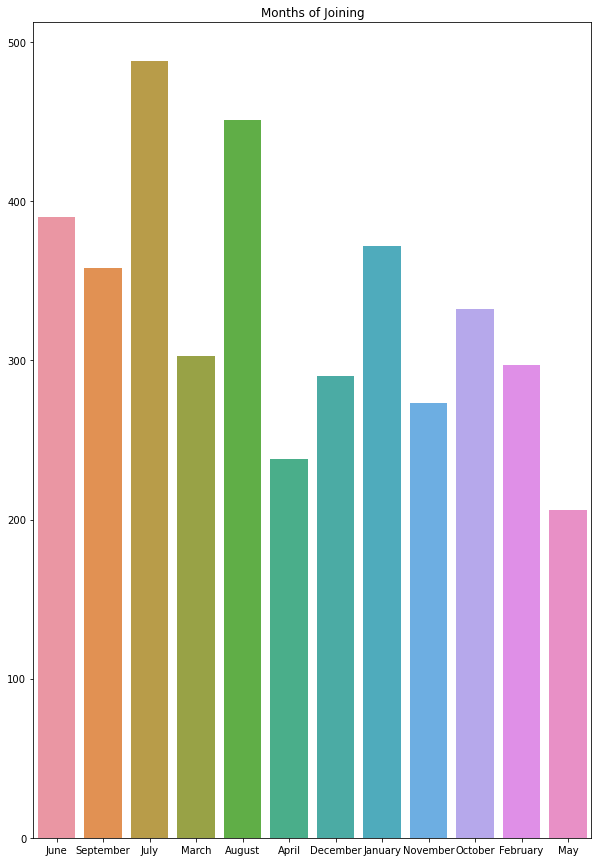

In [344]:
plt.figure(figsize=(10,15))
sns.countplot(x=Month)
plt.title("Months of Joining")
plt.xlabel("")
plt.ylabel("")
plt.show()

Text(0.5, 0.98, 'Salary levels by specialization')

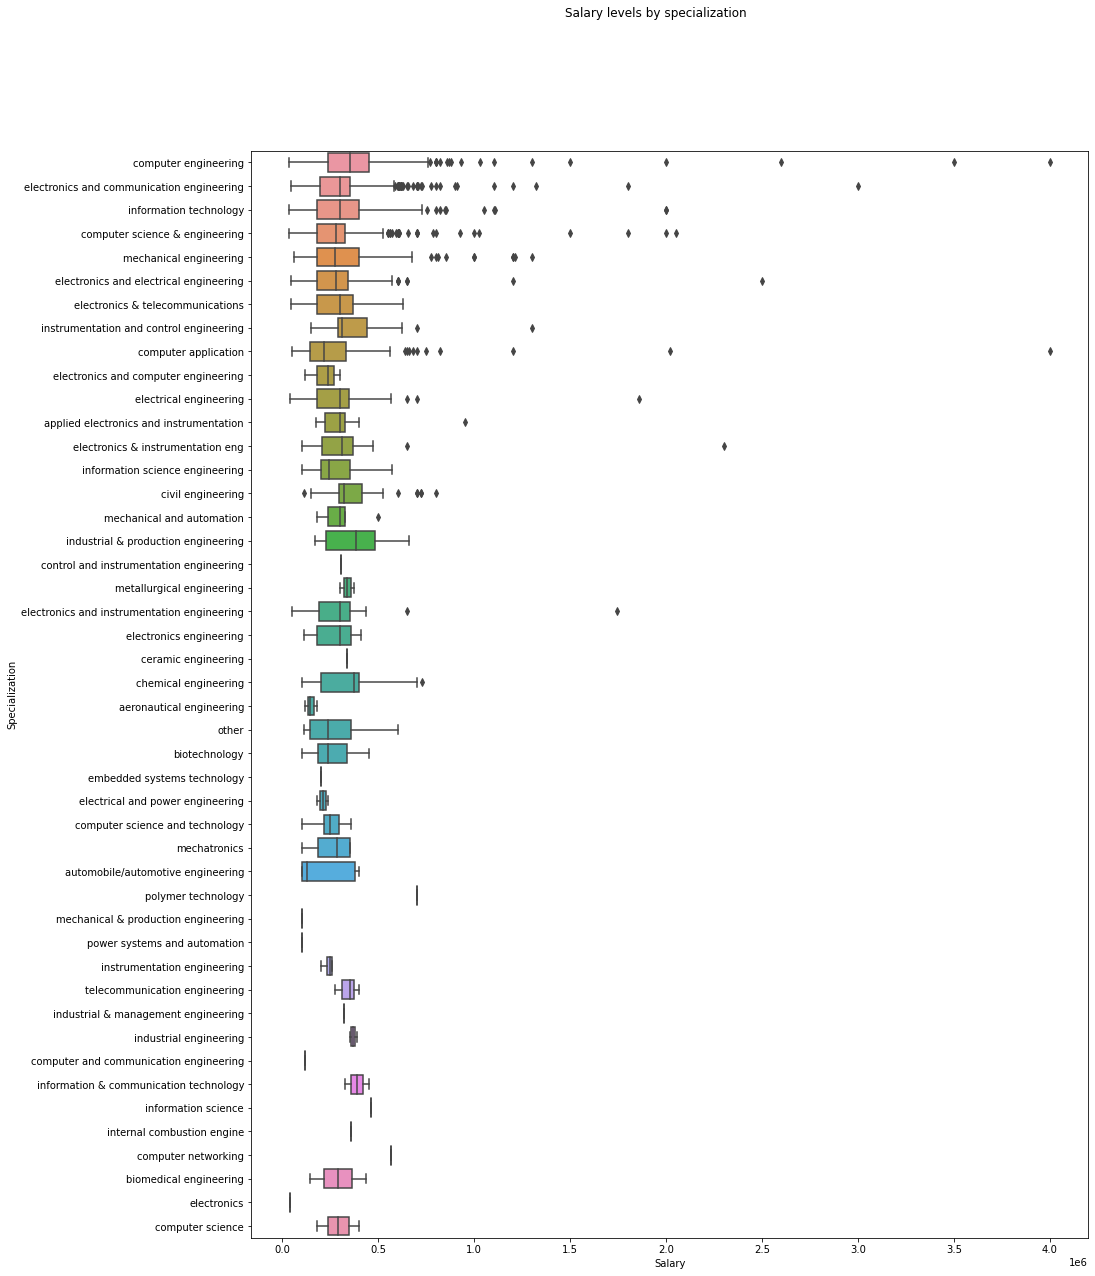

In [188]:
plt.figure(figsize=(15,20))
sns.boxplot(x='Salary',y='Specialization',data=df)
plt.suptitle('Salary levels by specialization')

The above plot shows that the salaries are high for computer engineer, electronic engineer Information technology,electroics and communications

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Degree', ylabel='count'>

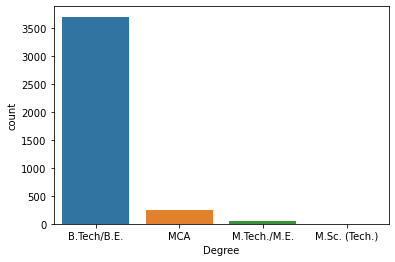

In [69]:
sns.countplot(df['Degree'])

More than 3500 are B. Tech graduates

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='12graduation'>

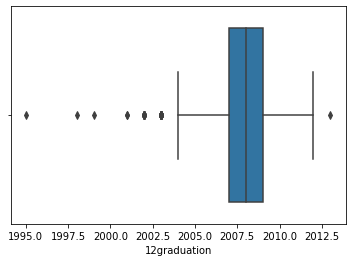

In [35]:
sns.boxplot(df['12graduation'])

In [345]:
df.Designation.value_counts()


software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: Designation, Length: 419, dtype: int64

In [227]:
role=[]
for i in df['Designation']:
    if ('senior' in i and 'engineer' not in i):
        role.append('senior')
    elif('trainee'in i and 'engineer' not in i):
        role.append('trainee')
    elif('engineer' in i and 'senior' not in i):
        role.append('engineer')
    elif('associate' in i and 'senior' not in i):
        role.append('associate')
    elif('developer' in i and 'senior' not in i):
        role.append('developer')
    elif('manager' in i and 'senior' not in i):
        role.append('manager')
    elif('analyst' in i):
        role.append('analyst')
    elif('consultant' in i):
        role.append('consultant')
    elif('executive' in i):
        role.append('executive')
    elif('designer' in i):
        role.append('designer')
    else:
        role.append('others')

For handling the designation column here am categirising as per data and requirement

In [230]:
df['Designation']=role

In [231]:
df['Designation'].value_counts()

engineer      1997
developer      668
others         538
analyst        402
manager        123
associate       66
executive       62
trainee         57
senior          43
designer        23
consultant      19
Name: Designation, dtype: int64

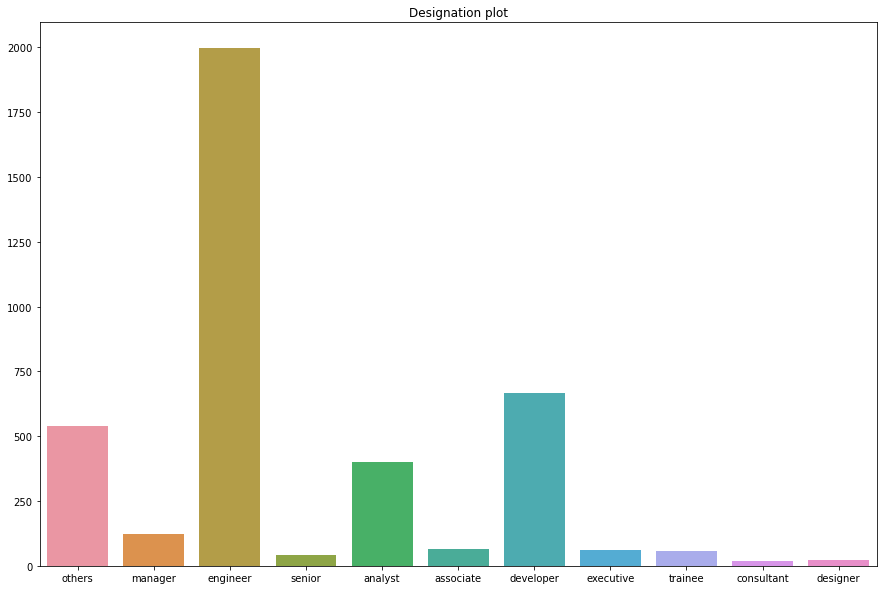

In [237]:
plt.figure(figsize=(15,10))
sns.countplot(x=role)
plt.title("Designation plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

After categorising with common key words we can see that there are more engineers 
to some extent developers, analysts 
Mostly the amcat aspirants are prefer IT roles

there are very few at senior level and manager level

In [245]:
x=df.groupby(["JobCity"])

In [246]:
x.ngroups

339

In [253]:
df["JobCity"].value_counts()

Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: JobCity, Length: 339, dtype: int64

In [255]:
df["Gender"].value_counts()


m    3041
f     957
Name: Gender, dtype: int64

In [256]:
Age = df["DOB"].dt.year
Age = abs(Age - 2015)

In [257]:
df["Age"] = Age

In [259]:
df['Age'] = df['Age'].astype('int')


In [ ]:
plt.hist(df["Age"],bins=6,rwidth=0.95)

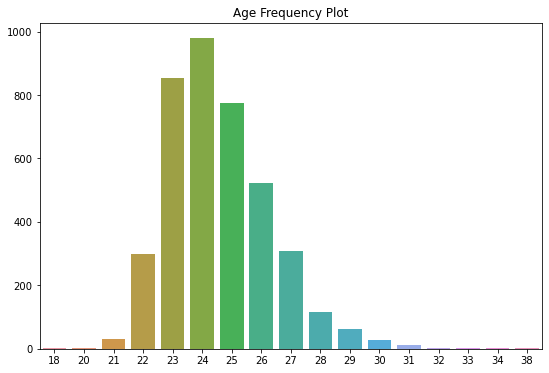

In [260]:
plt.figure(figsize=(9,6))
sns.countplot(x=Age)
plt.title("Age Frequency Plot")
plt.xlabel("")
plt.ylabel("")
plt.show()

From the above plot we can say that there are more number of amcats between 23 to 25
But its a happy thing that there are amcats who got job at the age above 30 as well

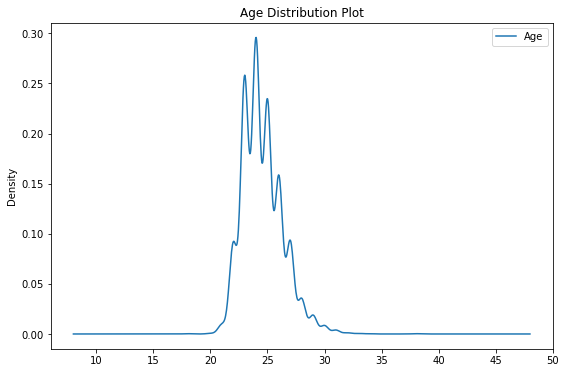

In [261]:
df["Age"].plot(kind='kde', title="Age Distribution Plot", legend=True,figsize=(9,6))
plt.show()

<AxesSubplot:>

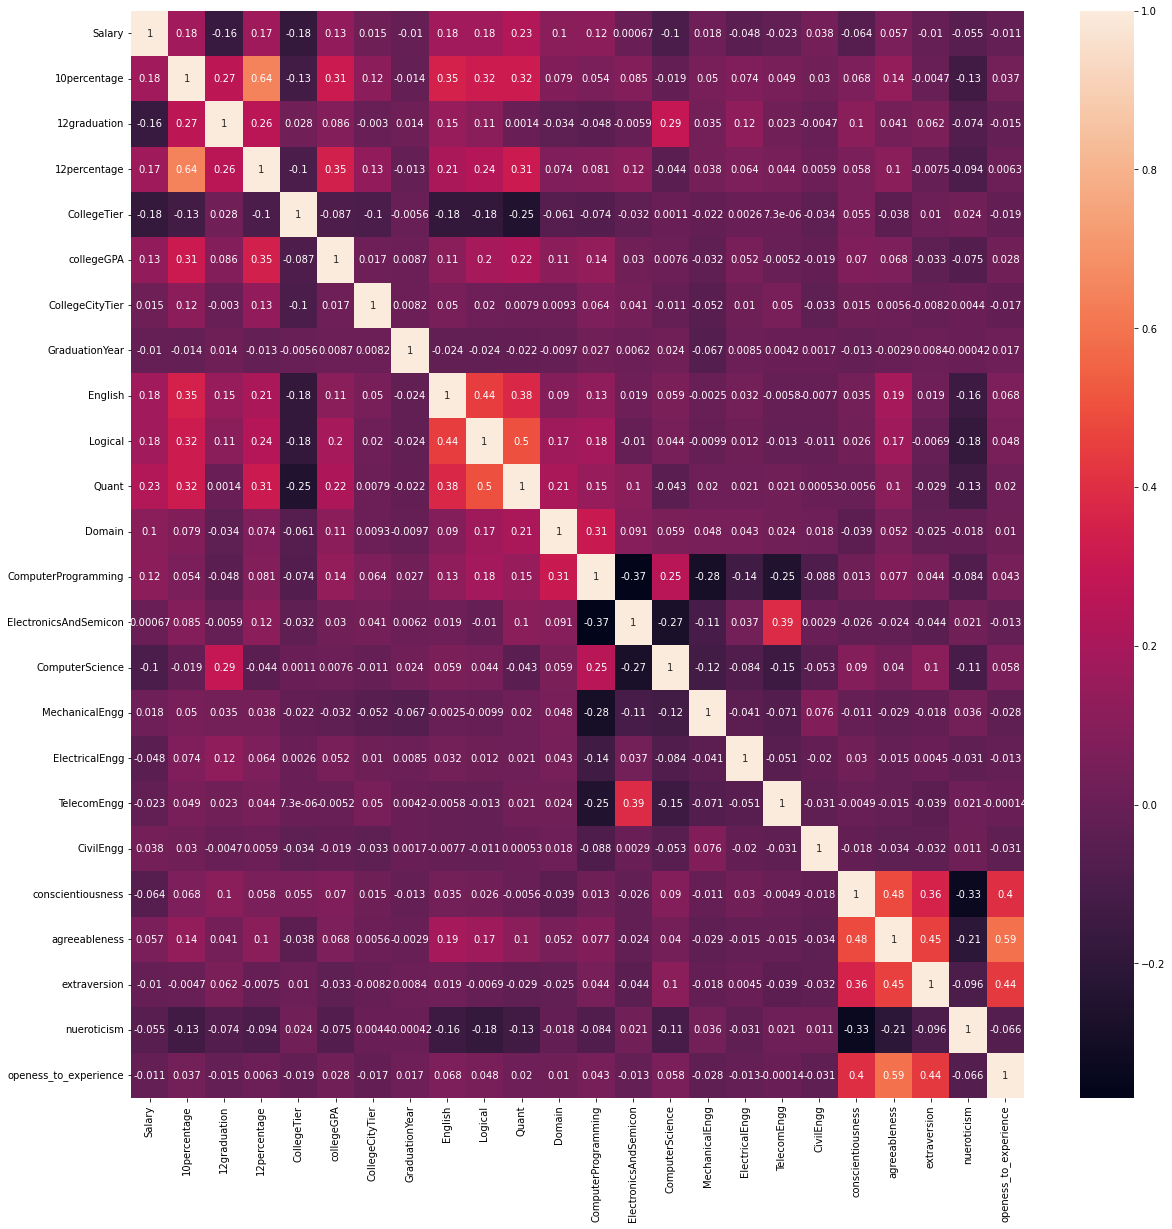

In [319]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

If the value is 1 it is said to have positive correlation between those variables, here it is positively correlated to itself.
There are few values with negative correlation with negative value.
There are few observations with 0.1 it means there is no relation at all between those variables.

Conclusion:
    Compared to maleand female male are more in number.
    The salaries are high for males.
    Males are mostly into computer engineering, IT.
    females are mostly into aeronotical, biotechnology etc.
    Female also have high salaries in ther respective fields but more are for men.
    The students who are doing jobs in IT and computers are graduated in B.Tech.
    Designation impacts the salaries.
    

Research Question :

Is there a relationship between gender and specialisation? (i.e. Does the preference of
Specialisation depend on the Gender?)

<Figure size 720x1080 with 0 Axes>

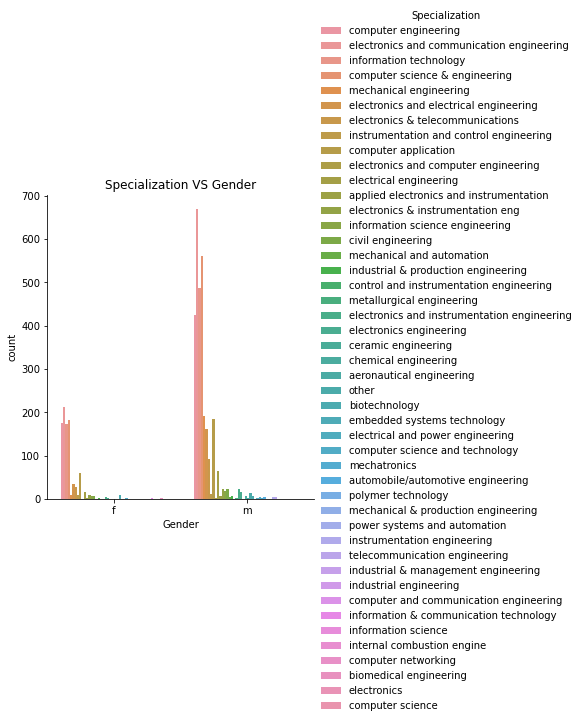

In [375]:
plt.figure(figsize=(10,15))
sns.catplot(x="Gender", hue="Specialization", kind="count", data=df)
plt.title("Specialization VS Gender")
plt.show()

In [378]:
# Calculating the frequency distribution of each specialization based on gender

rela = pd.crosstab(df['Gender'], df['Specialization'], margins=True)


rela.div(rela['All'], axis=0)

Specialization,aeronautical engineering,applied electronics and instrumentation,automobile/automotive engineering,biomedical engineering,biotechnology,ceramic engineering,chemical engineering,civil engineering,computer and communication engineering,computer application,...,mechanical & production engineering,mechanical and automation,mechanical engineering,mechatronics,metallurgical engineering,other,polymer technology,power systems and automation,telecommunication engineering,All
Gender,,,,,,,,,,,,,,,,,,,,,
f,0.001045,0.002090,0.000000,0.00209,0.009404,0.000000,0.001045,0.006270,0.000000,0.061651,...,0.000000,0.000000,0.010449,0.001045,0.000000,0.000000,0.000000,0.000000,0.001045,1.0
m,0.000658,0.002302,0.001644,0.00000,0.001973,0.000329,0.002631,0.007563,0.000329,0.060835,...,0.000329,0.001644,0.062808,0.000987,0.000658,0.004275,0.000329,0.000329,0.001644,1.0
All,0.000750,0.002251,0.001251,0.00050,0.003752,0.000250,0.002251,0.007254,0.000250,0.061031,...,0.000250,0.001251,0.050275,0.001001,0.000500,0.003252,0.000250,0.000250,0.001501,1.0


Observations:

The most popular specializations for both males and females are Computer Science and Electronics and IT

The proportion of females in Aeronautical Engineering, Biomedical Engineering, and Biotechnology is higher than the proportion of males.

The proportion of males in Chemical Engineering, Civil Engineering, and Mechanical Engineering is higher than the proportion of females..

Other specializations have a higher proportion of males.
